- This notebook is for testing AL with FS

In [27]:
from utils import computeR2
from utils import computeR2_train
from utils import computeR2_train_self
from utils import computeR2_unlabel
from utils import getBatch
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import iGS
import GSx
import GSy
import Uncertainty
from Random import RandomSampling
from utils import get_input
from utils import get_input_all
from utils import normalized_data
from Save_data import save_data
from utils import feature_selection
from Plot_performance import plot_performance
import pickle
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
myfile =r'Data/CombinedPSP.csv'
X, y = get_input_all(myfile)
X

,ABS_f_D,DISS_wf10_D,STAT_e,STAT_n_D,STAT_n_A,STAT_CC_D,STAT_CC_A,STAT_CC_D_An,STAT_CC_A_Ca,ABS_wf_D,...,CT_f_e_conn,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca
0,1.320169,0.087262,-0.006062,1.320161,-1.320161,-0.614829,1.114886,-0.824615,0.924866,1.338172,...,1.109499,0.752834,-0.039552,1.454934,0.890408,-0.067287,-1.242632,-0.543406,-1.214708,-0.819939
1,1.444165,-0.087533,-0.157241,1.444167,-1.444167,-0.779685,1.377647,-1.481384,0.352936,1.480020,...,-0.020990,0.949669,-1.491452,0.064221,0.890408,-0.643667,-1.111462,-0.149221,-1.168102,-0.872776
2,1.409079,-0.275106,-0.307555,1.409071,-1.409071,-0.669781,0.852126,-0.824615,0.924866,1.431939,...,1.120220,0.903150,-0.234910,0.979095,0.650772,-0.371898,-0.869648,-0.186794,-0.981680,-0.582170
3,1.354663,-0.413892,-0.411220,1.354672,-1.354672,-0.669781,0.852126,-0.824615,0.924866,1.373254,...,1.158342,0.923195,-0.201134,0.845019,0.549332,-0.454824,-0.688194,-0.026125,-0.935074,-0.714264
4,1.249975,-0.668069,-0.592634,1.249969,-1.249969,-0.614829,0.589365,-0.496230,0.924866,1.312365,...,1.533357,0.982160,0.097825,0.842390,0.380264,-0.535288,-0.397559,-0.030499,-0.538926,-1.136963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,-1.478167,-0.494943,-0.586587,-1.478165,1.478165,-0.230167,-0.724438,-0.824615,-0.790924,-1.487375,...,-1.052201,-1.063688,0.521964,-1.184528,-0.978161,-0.379287,1.093861,0.390183,-1.494342,0.580252
1704,-1.487525,-0.571953,-0.671247,-1.487524,1.487524,-0.340070,-0.724438,-0.824615,-0.790924,-1.510788,...,-0.984381,-1.041872,0.521964,-1.174013,-0.972280,-0.466319,1.093861,0.430552,-1.494342,0.553834
1705,-1.502734,-0.688133,-0.757635,-1.502733,1.502733,-0.395022,-0.724438,-0.824615,-0.790924,-1.524357,...,-0.947972,-1.050529,0.521964,-1.192415,-0.984042,-0.551709,1.093861,0.370893,-1.564251,0.474578
1706,-1.535498,-0.823785,-0.869075,-1.535489,1.535489,-0.559878,-0.724438,-1.153000,-0.790924,-1.638800,...,-1.181102,-1.235330,0.521964,-1.400102,-1.097244,-0.663372,1.093861,0.534655,-2.426456,1.055789


In [4]:
runs=1
labeledPoolN=10

Info.shape: (1, 1)
R2.shape (1, 1)
InfoRes [[0.45826429]]
Features sorted by their score:
[(0.1416, 'STAT_CC_D_An'), (0.1227, 'CT_f_A_tort1'), (0.1207, 'CT_e_A_Ca'), (0.1045, 'STAT_e'), (0.082, 'DISS_f10_D'), (0.0795, 'CT_f_conn_D_An'), (0.0748, 'CT_f_e_conn'), (0.0615, 'DISS_wf10_D'), (0.0562, 'STAT_CC_D'), (0.0267, 'CT_e_conn'), (0.0227, 'STAT_CC_A_Ca'), (0.0206, 'CT_n_A_adj_Ca'), (0.0206, 'ABS_f_D'), (0.0163, 'ABS_wf_D'), (0.0128, 'CT_n_D_adj_An'), (0.0117, 'CT_f_conn_A_Ca'), (0.0075, 'CT_f_D_tort1'), (0.0052, 'STAT_n_D'), (0.0047, 'CT_e_D_An'), (0.0039, 'STAT_n_A'), (0.0038, 'STAT_CC_A')]


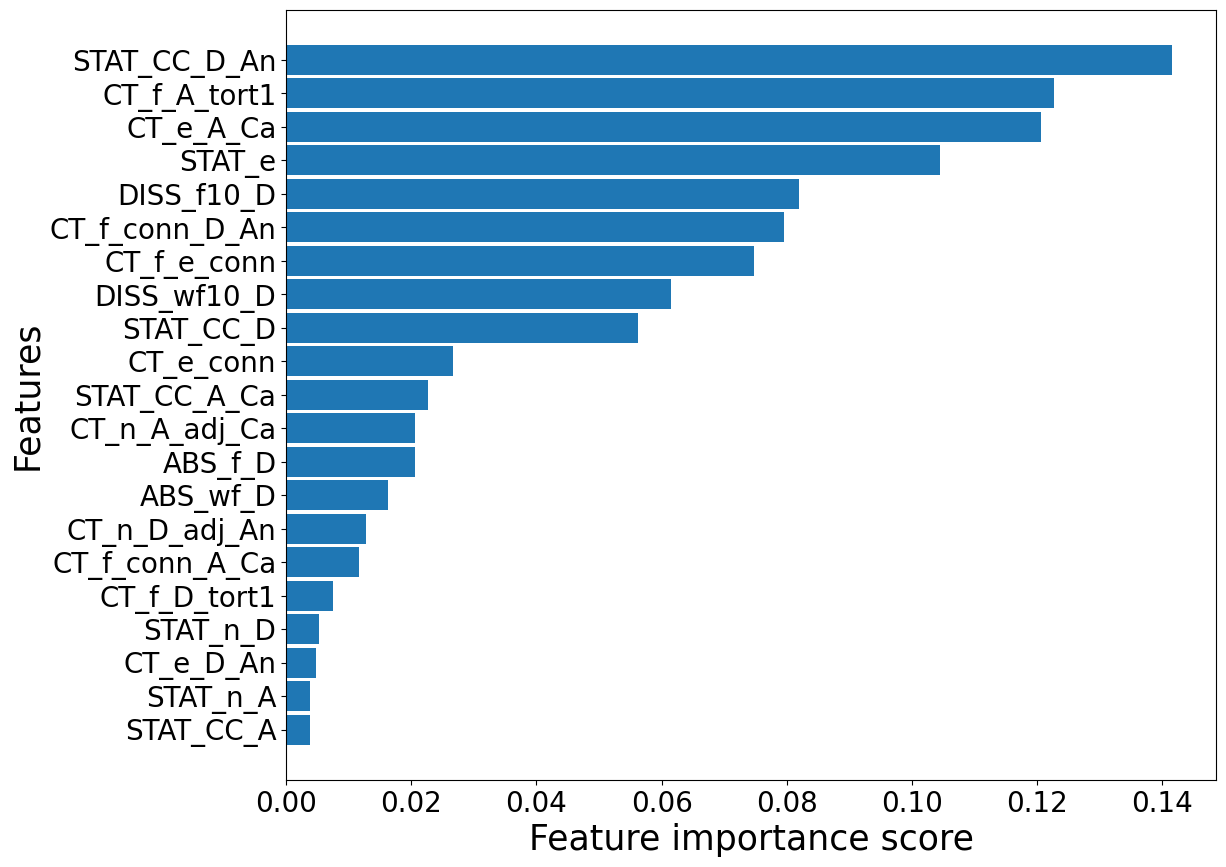

Iteration: 0
Features sorted by their score:
[(0.1717, 'CT_f_A_tort1'), (0.1449, 'CT_e_A_Ca'), (0.1363, 'STAT_CC_D_An'), (0.1136, 'STAT_e'), (0.1055, 'DISS_wf10_D'), (0.0821, 'STAT_CC_D'), (0.0549, 'DISS_f10_D'), (0.0385, 'STAT_CC_A_Ca'), (0.0329, 'CT_f_conn_D_An'), (0.0295, 'CT_f_e_conn'), (0.0265, 'CT_f_conn_A_Ca'), (0.0193, 'CT_e_conn'), (0.0111, 'CT_n_D_adj_An'), (0.0081, 'ABS_wf_D'), (0.0056, 'CT_n_A_adj_Ca'), (0.0045, 'CT_f_D_tort1'), (0.0044, 'ABS_f_D'), (0.0042, 'STAT_n_A'), (0.0029, 'STAT_CC_A'), (0.0023, 'CT_e_D_An'), (0.0012, 'STAT_n_D')]


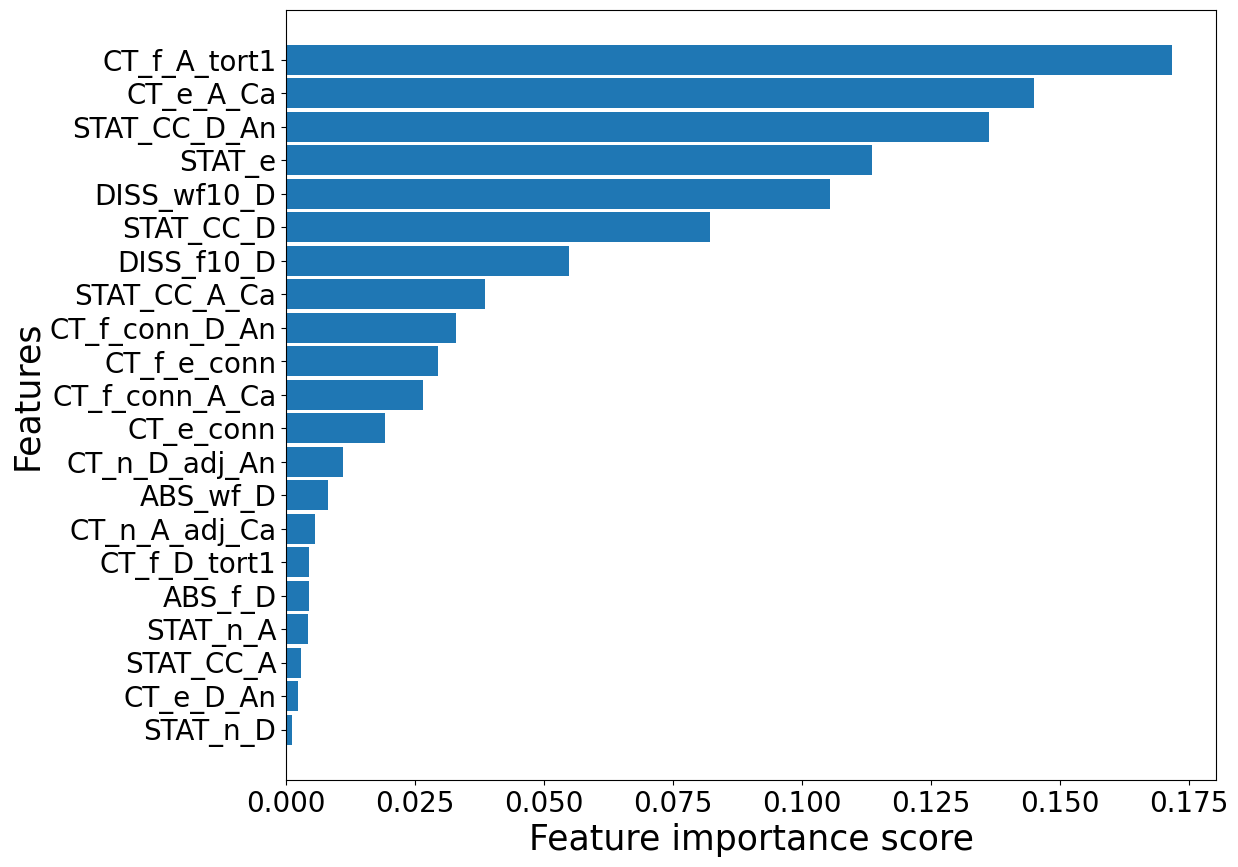

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Features sorted by their score:
[(0.2119, 'STAT_e'), (0.1966, 'CT_f_A_tort1'), (0.1506, 'DISS_f10_D'), (0.1293, 'DISS_wf10_D'), (0.0706, 'CT_e_A_Ca'), (0.0647, 'STAT_CC_D_An'), (0.0552, 'STAT_CC_D'), (0.0317, 'CT_f_e_conn'), (0.0115, 'ABS_wf_D'), (0.0112, 'STAT_n_A'), (0.0112, 'CT_f_D_tort1'), (0.0095, 'STAT_n_D'), (0.0094, 'CT_n_A_adj_Ca'), (0.0073, 'CT_e_conn'), (0.007, 'CT_n_D_adj_An'), (0.0069, 'ABS_f_D'), (0.0052, 'CT_f_conn_A_Ca'), (0.0034, 'CT_e_D_An'), (0.0028, 'STAT_CC_A_Ca'), (0.0028, 'CT_f_conn_D_An'), (0.0012, 'STAT_CC_A')]


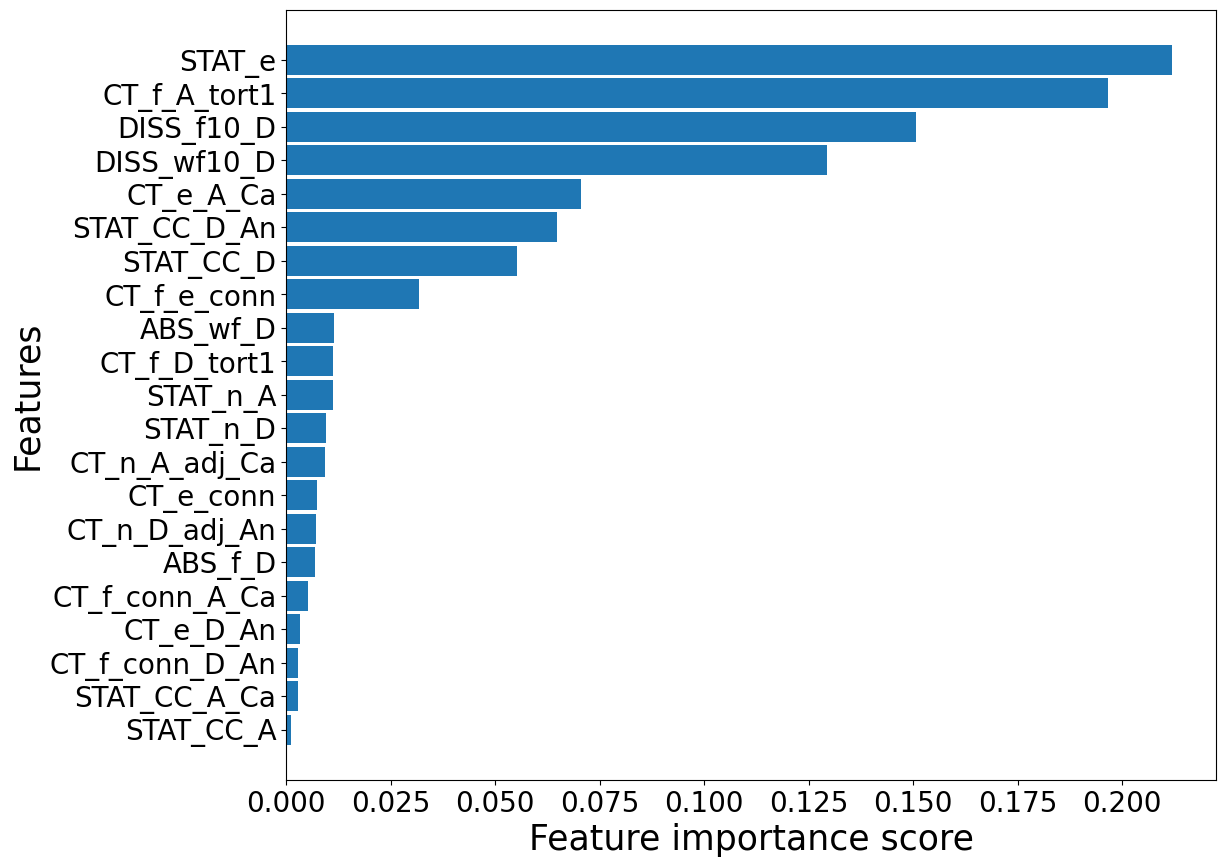

Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Features sorted by their score:
[(0.2177, 'STAT_CC_D_An'), (0.2016, 'DISS_f10_D'), (0.197, 'STAT_e'), (0.1928, 'DISS_wf10_D'), (0.0456, 'CT_f_A_tort1'), (0.0406, 'CT_e_A_Ca'), (0.0279, 'CT_n_A_adj_Ca'), (0.0174, 'CT_n_D_adj_An'), (0.0159, 'STAT_CC_D'), (0.0074, 'CT_e_D_An'), (0.0072, 'CT_e_conn'), (0.0063, 'ABS_wf_D'), (0.0045, 'STAT_n_D'), (0.0031, 'CT_f_e_conn'), (0.0029, 'CT_f_D_tort1'), (0.0026, 'CT_f_conn_D_An'), (0.0025, 'STAT_n_A'), (0.0022, 'STAT_CC_A'), (0.0017, 'CT_f_conn_A_Ca'), (0.0015, 'STAT_CC_A_Ca'), (0.0015, 'ABS_f_D')]


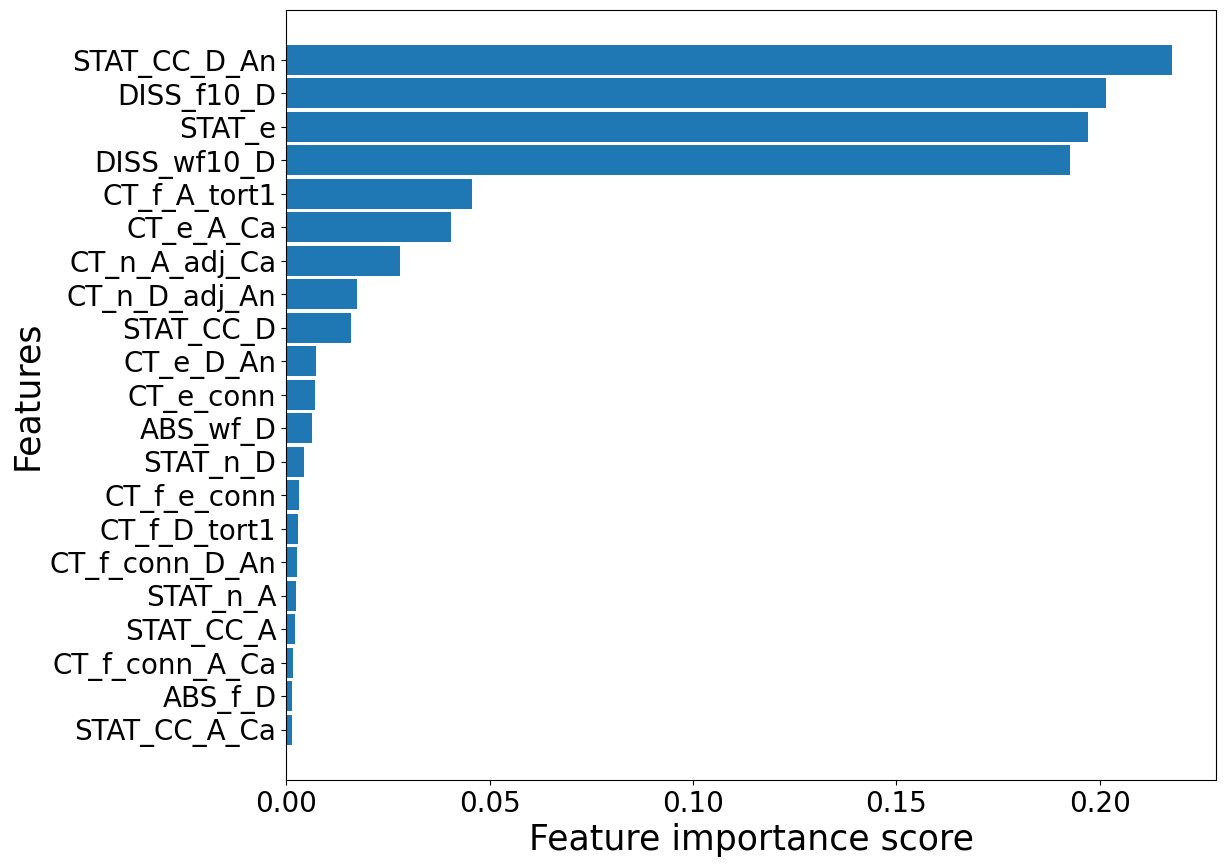

In [9]:
R2Smooth = []
MSEsmooth = []
MAEsmooth = []
Infosmooth = []
R2_train = []
R2_trainS = []
SelectData = []
freq=10
fs=True
fs_score=0.98

np.random.seed(0) # set the same random choice for initial codition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dataPool = pd.concat([X_train, y_train], axis=1)
# Reset the index to ensure the indices are continuous integers
dataPool = dataPool.reset_index(drop=True)
SelectIdx=np.random.choice(dataPool.shape[0], labeledPoolN, replace=False)
dataPoolL = dataPool.iloc[SelectIdx, :]
dataPool = dataPool.drop(SelectIdx)

R2Res = np.empty((0,1), float)
MSERes = np.empty((0,1), float)
MAERes = np.empty((0,1), float)
InfoRes = np.empty((0,1), float)
R2Res_t = np.empty((0,1), float)
R2Res_tS = np.empty((0,1), float)

R2, Model, MSEstart, MAEstart = computeR2(dataPoolL, X_test, y_test, fs=True)
R2_t, Model_t, MSEstart_t, _ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
R2_tS, Model_tS, MSEstart_tS, _ = computeR2_train_self(dataPoolL, fs=True)
Info = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)
print(f'Info.shape: {Info.shape}')
print(f'R2.shape {R2.shape}')

R2Res = np.append(R2Res, R2, axis=0)
MSERes = np.append(MSERes, MSEstart, axis=0)
MAERes = np.append(MAERes, MAEstart, axis=0)
InfoRes = np.append(InfoRes, Info, axis=0)
print(f'InfoRes {InfoRes}')

R2Res_t = np.append(R2Res_t, R2_t, axis=0)
R2Res_tS = np.append(R2Res_tS, R2_tS, axis=0)

# feature selection
indices = feature_selection(dataPoolL.iloc[:, 0:-1],dataPoolL.iloc[:, -1], fs_score)
dataPoolL_fs = pd.concat([dataPoolL.iloc[:, 0:-1].iloc[:, indices],dataPoolL.iloc[:, -1]],axis=1)
dataPool_fs = pd.concat([dataPool.iloc[:, 0:-1].iloc[:, indices], dataPool.iloc[:, -1]],axis=1)

dataPoolL_init = dataPoolL
dataPool_init = dataPool

for i in range(21):
    print(f"Iteration: {i}")
    # print(f"DataPool shape before getBatch(): {dataPool.shape}")
    # DataPool_ori = DataPool
    dataBatch_fs, dataPool_fs,Idx = getBatch(dataPool_fs, 1, fs=True)
    # print(f"DataPool shape after getBatch(): {dataPool.shape}")
    # dataPoolL = np.vstack((dataPoolL, dataBatch))
    dataPoolL_fs = pd.concat([dataPoolL_fs, dataBatch_fs], axis=0, ignore_index=True)

    # Recover features
    dataBatch = dataPool.loc[Idx]
    dataPool = dataPool.drop(Idx)
    dataPoolL = pd.concat([dataPoolL, dataBatch], axis=0, ignore_index=True)
    

    cR2, Model, cMSE, cMAE = computeR2(dataPoolL, X_test, y_test, fs=True)
    cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
    cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL, fs=True)
    cInfo = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)

    R2Res = np.append(R2Res, cR2, axis=0)
    MSERes = np.append(MSERes, cMSE, axis=0)
    MAERes = np.append(MAERes, cMAE, axis=0)
    InfoRes = np.append(InfoRes, cInfo, axis=0)
    R2Res_t = np.append(R2Res_t, cR2_t, axis=0)
    R2Res_tS = np.append(R2Res_tS, cR2_tS, axis=0)

    if i % freq ==0:
        indices = feature_selection(dataPoolL.iloc[:, 0:-1],dataPoolL.iloc[:, -1], fs_score)
        dataPoolL_fs = pd.concat([dataPoolL.iloc[:, 0:-1].iloc[:, indices],dataPoolL.iloc[:, -1]],axis=1)
        dataPool_fs = pd.concat([dataPool.iloc[:, 0:-1].iloc[:, indices], dataPool.iloc[:, -1]],axis=1)

        cR2, Model, cMSE, cMAE = computeR2(dataPoolL, X_test, y_test, fs=True)
        cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
        cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL, fs=True)
        cInfo = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)
        
        # cR2, Model, cMSE, cMAE = computeR2(dataPoolL_fs, X_test.iloc[:,indices], y_test, fs=True)
        # cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL_fs, X_train.iloc[:,indices], y_train, fs=True)
        # cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL_fs, fs=True)
        # cInfo = computeR2_unlabel(dataPool_fs, dataPoolL_fs, Model, fs=True)
    
        R2Res = np.append(R2Res, cR2, axis=0)
        MSERes = np.append(MSERes, cMSE, axis=0)
        MAERes = np.append(MAERes, cMAE, axis=0)
        InfoRes = np.append(InfoRes, cInfo, axis=0)
        R2Res_t = np.append(R2Res_t, cR2_t, axis=0)
        R2Res_tS = np.append(R2Res_tS, cR2_tS, axis=0)
        
        # Recover feature process?

 
    
R2Smooth.append(R2Res)
MSEsmooth.append(MSERes)
MAEsmooth.append(MAERes)
Infosmooth.append(InfoRes)
R2_train.append(R2Res_t)
R2_trainS.append(R2Res_tS)
SelectData.append(dataPoolL)

In [26]:
dataPool = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})
dataPool = dataPool.drop(1)
dataPool

,A,B
0,1,10
2,3,30
3,4,40
4,5,50


In [29]:
dataPool.index

Index([0, 2, 3, 4], dtype='int64')

In [15]:
from datetime import datetime
current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

In [16]:
formatted_datetime
    

'2023-12-18_22-21-22'

In [24]:
# Hyperparameters
numDataTotal = 509
labeledPoolN = 10
batchSz = 1
nAccs = (numDataTotal-labeledPoolN)//batchSz
RepeatTimes = 1
runs=2
fs_score=0.98
freq=10
Alg='Random_fs'

In [15]:
# model performance on dataset with all features
R2Smooth = []
MSEsmooth = []
MAEsmooth = []
Infosmooth = []
R2_train = []
R2_trainS = []
SelectData = []
    
for rt in tqdm(range(runs)):
    np.random.seed(rt) # set the same random choice for initial codition
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rt)
    dataPool = pd.concat([X_train, y_train], axis=1)
    # Reset the index to ensure the indices are continuous integers
    # dataPool = dataPool.reset_index(drop=True)
    SelectIdx=np.random.choice(dataPool.index, labeledPoolN, replace=False)
    print(f'SelectIdx:{SelectIdx}')
    dataPoolL = dataPool.loc[SelectIdx, :]
    dataPool = dataPool.drop(SelectIdx)
    # dataPool = dataPool.reset_index(drop=True)

    R2Res = np.empty((0,1), float)
    MSERes = np.empty((0,1), float)
    MAERes = np.empty((0,1), float)
    InfoRes = np.empty((0,1), float)
    R2Res_t = np.empty((0,1), float)
    R2Res_tS = np.empty((0,1), float)

    R2, Model, MSEstart, MAEstart = computeR2(dataPoolL, X_test, y_test, fs=True)
    R2_t, Model_t, MSEstart_t, _ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
    R2_tS, Model_tS, MSEstart_tS, _ = computeR2_train_self(dataPoolL, fs=True)
    Info = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)
    # print(f'Info.shape: {Info.shape}')
    # print(f'R2.shape {R2.shape}')

    R2Res = np.append(R2Res, R2, axis=0)
    MSERes = np.append(MSERes, MSEstart, axis=0)
    MAERes = np.append(MAERes, MAEstart, axis=0)
    InfoRes = np.append(InfoRes, Info, axis=0)
    # print(f'InfoRes {InfoRes}')

    R2Res_t = np.append(R2Res_t, R2_t, axis=0)
    R2Res_tS = np.append(R2Res_tS, R2_tS, axis=0)

    # feature selection
    indices = feature_selection(dataPoolL.iloc[:, 0:-1],dataPoolL.iloc[:, -1], fs_score, 0, Alg)
    dataPoolL_fs = pd.concat([dataPoolL.iloc[:, 0:-1].iloc[:, indices],dataPoolL.iloc[:, -1]],axis=1)
    dataPool_fs = pd.concat([dataPool.iloc[:, 0:-1].iloc[:, indices], dataPool.iloc[:, -1]],axis=1)

    dataPoolL_init = dataPoolL
    dataPool_init = dataPool

    for i in range(499):
        # print(f"Iteration: {i}")
        # print(f"DataPool shape before getBatch(): {dataPool.shape}")
        # DataPool_ori = DataPool
        dataBatch_fs, dataPool_fs,Idx = getBatch(dataPool_fs, 1, fs=True)
        # print(f"DataPool shape after getBatch(): {dataPool.shape}")
        # dataPoolL = np.vstack((dataPoolL, dataBatch))
        dataPoolL_fs = pd.concat([dataPoolL_fs, dataBatch_fs], axis=0, ignore_index=True)

        # Recover features
        dataBatch = dataPool.loc[Idx]
        dataPool = dataPool.drop(Idx)
        dataPoolL = pd.concat([dataPoolL, dataBatch], axis=0, ignore_index=True)
        

        cR2, Model, cMSE, cMAE = computeR2(dataPoolL, X_test, y_test, fs=True)
        cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
        cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL, fs=True)
        cInfo = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)

        R2Res = np.append(R2Res, cR2, axis=0)
        MSERes = np.append(MSERes, cMSE, axis=0)
        MAERes = np.append(MAERes, cMAE, axis=0)
        InfoRes = np.append(InfoRes, cInfo, axis=0)
        R2Res_t = np.append(R2Res_t, cR2_t, axis=0)
        R2Res_tS = np.append(R2Res_tS, cR2_tS, axis=0)

        if i % freq ==0:
            indices = feature_selection(dataPoolL.iloc[:, 0:-1],dataPoolL.iloc[:, -1], fs_score, i, Alg)
            dataPoolL_fs = pd.concat([dataPoolL.iloc[:, 0:-1].iloc[:, indices],dataPoolL.iloc[:, -1]],axis=1)
            dataPool_fs = pd.concat([dataPool.iloc[:, 0:-1].iloc[:, indices], dataPool.iloc[:, -1]],axis=1)

            # cR2, Model, cMSE, cMAE = computeR2(dataPoolL, X_test, y_test, fs=True)
            # cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
            # cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL, fs=True)
            # cInfo = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)
            
            # # cR2, Model, cMSE, cMAE = computeR2(dataPoolL_fs, X_test.iloc[:,indices], y_test, fs=True)
            # # cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL_fs, X_train.iloc[:,indices], y_train, fs=True)
            # # cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL_fs, fs=True)
            # # cInfo = computeR2_unlabel(dataPool_fs, dataPoolL_fs, Model, fs=True)
        
            # R2Res = np.append(R2Res, cR2, axis=0)
            # MSERes = np.append(MSERes, cMSE, axis=0)
            # MAERes = np.append(MAERes, cMAE, axis=0)
            # InfoRes = np.append(InfoRes, cInfo, axis=0)
            # R2Res_t = np.append(R2Res_t, cR2_t, axis=0)
            # R2Res_tS = np.append(R2Res_tS, cR2_tS, axis=0)
  
    R2Smooth.append(R2Res)
    MSEsmooth.append(MSERes)
    MAEsmooth.append(MAERes)
    Infosmooth.append(InfoRes)
    R2_train.append(R2Res_t)
    R2_trainS.append(R2Res_tS)
    SelectData.append(dataPoolL)

  0%|          | 0/2 [00:00<?, ?it/s]

SelectIdx:[ 329 1001  189  808  567  746  300 1293  194  504]
Features sorted by their score:
[(0.1431, 'd11'), (0.1402, 'd3'), (0.1222, 'd14'), (0.1141, 'd21'), (0.0857, 'd18'), (0.079, 'd19'), (0.0658, 'd7'), (0.0505, 'd16'), (0.0414, 'd1'), (0.0305, 'd13'), (0.0287, 'd2'), (0.0232, 'd5'), (0.022, 'd10'), (0.0208, 'd4'), (0.016, 'd15'), (0.0098, 'd9'), (0.0024, 'd20'), (0.0016, 'd6'), (0.0015, 'd12'), (0.0007, 'd8'), (0.0007, 'd17')]
Features sorted by their score:
[(0.1493, 'd3'), (0.1224, 'd16'), (0.1083, 'd21'), (0.1031, 'd11'), (0.0763, 'd18'), (0.0722, 'd19'), (0.0649, 'd7'), (0.0634, 'd14'), (0.0614, 'd15'), (0.0495, 'd1'), (0.0207, 'd4'), (0.0201, 'd9'), (0.0187, 'd2'), (0.0185, 'd6'), (0.0137, 'd13'), (0.0111, 'd10'), (0.0107, 'd5'), (0.0068, 'd20'), (0.0049, 'd8'), (0.0038, 'd12'), (0.0005, 'd17')]
Features sorted by their score:
[(0.339, 'd3'), (0.2405, 'd11'), (0.1188, 'd2'), (0.1072, 'd19'), (0.0293, 'd8'), (0.0287, 'd21'), (0.0237, 'd17'), (0.021, 'd18'), (0.0177, 'd16')

  0%|          | 0/2 [00:20<?, ?it/s]


KeyboardInterrupt: 

In [23]:
for rt in tqdm(range(runs)):
    np.random.seed(rt) # set the same random choice for initial codition
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rt)
    dataPool = pd.concat([X_train, y_train], axis=1)
    print(dataPool)
    SelectIdx=np.random.choice(dataPool.index, labeledPoolN, replace=False)
    print(f'SelectIdx:{SelectIdx}')
    dataPoolL = dataPool.loc[SelectIdx, :]
    dataPool = dataPool.drop(SelectIdx)

100%|██████████| 2/2 [00:00<00:00, 88.36it/s]

       ABS_f_D  DISS_wf10_D    STAT_e  STAT_n_D  STAT_n_A  STAT_CC_D  \
170   1.481596    -0.444895 -0.522660  1.481603 -1.481603  -0.999492   
1628 -1.416170     0.160942 -0.094178 -1.416162  1.416162   0.264399   
1327 -0.872166    -0.401166 -0.439728 -0.872173  0.872173  -0.230167   
1256 -1.198573     0.039940 -0.171063 -1.198567  1.198567   0.044592   
1286 -0.767478     0.730171  0.469070 -0.767470  0.767470   0.649062   
...        ...          ...       ...       ...       ...        ...   
835   0.264950     0.662647  0.425012  0.264939 -0.264939   0.154496   
1216 -0.379666     0.216062  0.009487 -0.379658  0.379658   0.154496   
1653 -1.299755     0.510071  0.264331 -1.299760  1.299760   0.758965   
559   0.121623    -1.000525 -0.870803  0.121630 -0.121630  -0.614829   
684   0.425785    -1.465275 -1.129966  0.425796 -0.425796  -0.779685   

      STAT_CC_A  STAT_CC_D_An  STAT_CC_A_Ca  ABS_wf_D  ...  CT_f_conn_D_An  \
170    1.903168     -1.481384      0.924866  1.419548  ..

In [26]:
R2Smooth = []
MSEsmooth = []
MAEsmooth = []
Infosmooth = []
R2_train = []
R2_trainS = []
SelectData = []
    
for rt in tqdm(range(runs)):
    np.random.seed(rt) # set the same random choice for initial codition
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rt)
    dataPool = pd.concat([X_train, y_train], axis=1)
    # Reset the index to ensure the indices are continuous integers
    # dataPool = dataPool.reset_index(drop=True)
    SelectIdx=np.random.choice(dataPool.index, labeledPoolN, replace=False)
    print(f'SelectIdx:{SelectIdx}')
    # use loc based on actual index not on the order
    dataPoolL = dataPool.loc[SelectIdx, :]
    dataPool = dataPool.drop(SelectIdx)

    R2Res = np.empty((0,1), float)
    MSERes = np.empty((0,1), float)
    MAERes = np.empty((0,1), float)
    InfoRes = np.empty((0,1), float)
    R2Res_t = np.empty((0,1), float)
    R2Res_tS = np.empty((0,1), float)

    # feature selection
    indices = feature_selection(dataPoolL.iloc[:, 0:-1],dataPoolL.iloc[:, -1], fs_score, 0, Alg)
    dataPoolL_fs = pd.concat([dataPoolL.iloc[:, 0:-1].iloc[:, indices],dataPoolL.iloc[:, -1]],axis=1)
    dataPool_fs = pd.concat([dataPool.iloc[:, 0:-1].iloc[:, indices], dataPool.iloc[:, -1]],axis=1)

    R2, Model, MSEstart, MAEstart = computeR2(dataPoolL_fs, X_test.iloc[:, indices], y_test, fs=True)
    R2_t, Model_t, MSEstart_t, _ = computeR2_train(dataPoolL_fs, X_train.iloc[:, indices], y_train, fs=True)
    R2_tS, Model_tS, MSEstart_tS, _ = computeR2_train_self(dataPoolL_fs, fs=True)
    Info = computeR2_unlabel(dataPool_fs, dataPoolL_fs, Model, fs=True)
    # print(f'Info.shape: {Info.shape}')
    # print(f'R2.shape {R2.shape}')

    R2Res = np.append(R2Res, R2, axis=0)
    MSERes = np.append(MSERes, MSEstart, axis=0)
    MAERes = np.append(MAERes, MAEstart, axis=0)
    InfoRes = np.append(InfoRes, Info, axis=0)
    # print(f'InfoRes {InfoRes}')

    R2Res_t = np.append(R2Res_t, R2_t, axis=0)
    R2Res_tS = np.append(R2Res_tS, R2_tS, axis=0)

    

    # dataPoolL_init = dataPoolL
    # dataPool_init = dataPool

    for i in range(499):
        # print(f"Iteration: {i}")
        # print(f"DataPool shape before getBatch(): {dataPool.shape}")
        # DataPool_ori = DataPool
        dataBatch_fs, dataPool_fs,Idx = getBatch(dataPool_fs, 1, fs=True)
        # print(f"DataPool shape after getBatch(): {dataPool.shape}")
        # dataPoolL = np.vstack((dataPoolL, dataBatch))
        dataPoolL_fs = pd.concat([dataPoolL_fs, dataBatch_fs], axis=0, ignore_index=True)

        # Recover features
        dataBatch = dataPool.loc[Idx]
        dataPool = dataPool.drop(Idx)
        dataPoolL = pd.concat([dataPoolL, dataBatch], axis=0, ignore_index=True)
        

        cR2, Model, cMSE, cMAE = computeR2(dataPoolL_fs, X_test.iloc[:, indices], y_test, fs=True)
        cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL_fs, X_train.iloc[:, indices], y_train, fs=True)
        cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL_fs, fs=True)
        cInfo = computeR2_unlabel(dataPool_fs, dataPoolL_fs, Model, fs=True)

        R2Res = np.append(R2Res, cR2, axis=0)
        MSERes = np.append(MSERes, cMSE, axis=0)
        MAERes = np.append(MAERes, cMAE, axis=0)
        InfoRes = np.append(InfoRes, cInfo, axis=0)
        R2Res_t = np.append(R2Res_t, cR2_t, axis=0)
        R2Res_tS = np.append(R2Res_tS, cR2_tS, axis=0)

        if i % freq ==0:
            indices = feature_selection(dataPoolL.iloc[:, 0:-1],dataPoolL.iloc[:, -1], fs_score, i, Alg)
            dataPoolL_fs = pd.concat([dataPoolL.iloc[:, 0:-1].iloc[:, indices],dataPoolL.iloc[:, -1]],axis=1)
            dataPool_fs = pd.concat([dataPool.iloc[:, 0:-1].iloc[:, indices], dataPool.iloc[:, -1]],axis=1)

            # cR2, Model, cMSE, cMAE = computeR2(dataPoolL, X_test, y_test, fs=True)
            # cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL, X_train, y_train, fs=True)
            # cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL, fs=True)
            # cInfo = computeR2_unlabel(dataPool, dataPoolL, Model, fs=True)
            
            # # cR2, Model, cMSE, cMAE = computeR2(dataPoolL_fs, X_test.iloc[:,indices], y_test, fs=True)
            # # cR2_t, Model_t, cMSEstart_t,_ = computeR2_train(dataPoolL_fs, X_train.iloc[:,indices], y_train, fs=True)
            # # cR2_tS, Model_tS, cMSEstart_tS,_ = computeR2_train_self(dataPoolL_fs, fs=True)
            # # cInfo = computeR2_unlabel(dataPool_fs, dataPoolL_fs, Model, fs=True)
        
            # R2Res = np.append(R2Res, cR2, axis=0)
            # MSERes = np.append(MSERes, cMSE, axis=0)
            # MAERes = np.append(MAERes, cMAE, axis=0)
            # InfoRes = np.append(InfoRes, cInfo, axis=0)
            # R2Res_t = np.append(R2Res_t, cR2_t, axis=0)
            # R2Res_tS = np.append(R2Res_tS, cR2_tS, axis=0)
  
    R2Smooth.append(R2Res)
    MSEsmooth.append(MSERes)
    MAEsmooth.append(MAERes)
    Infosmooth.append(InfoRes)
    R2_train.append(R2Res_t)
    R2_trainS.append(R2Res_tS)
    SelectData.append(dataPoolL)

  0%|          | 0/2 [00:00<?, ?it/s]

SelectIdx:[ 329 1001  189  808  567  746  300 1293  194  504]
Features sorted by their score:
[(0.1416, 'd8'), (0.1227, 'd19'), (0.1207, 'd17'), (0.1045, 'd3'), (0.082, 'd11'), (0.0795, 'd13'), (0.0748, 'd12'), (0.0615, 'd2'), (0.0562, 'd6'), (0.0267, 'd15'), (0.0227, 'd9'), (0.0206, 'd21'), (0.0206, 'd1'), (0.0163, 'd10'), (0.0128, 'd20'), (0.0117, 'd14'), (0.0075, 'd18'), (0.0052, 'd4'), (0.0047, 'd16'), (0.0039, 'd5'), (0.0038, 'd7')]
Features sorted by their score:
[(0.1717, 'd19'), (0.1449, 'd17'), (0.1363, 'd8'), (0.1136, 'd3'), (0.1055, 'd2'), (0.0821, 'd6'), (0.0549, 'd11'), (0.0385, 'd9'), (0.0329, 'd13'), (0.0295, 'd12'), (0.0265, 'd14'), (0.0193, 'd15'), (0.0111, 'd20'), (0.0081, 'd10'), (0.0056, 'd21'), (0.0045, 'd18'), (0.0044, 'd1'), (0.0042, 'd5'), (0.0029, 'd7'), (0.0023, 'd16'), (0.0012, 'd4')]
Features sorted by their score:
[(0.2119, 'd3'), (0.1966, 'd19'), (0.1506, 'd11'), (0.1293, 'd2'), (0.0706, 'd17'), (0.0647, 'd8'), (0.0552, 'd6'), (0.0317, 'd12'), (0.0115, 'd1

 50%|█████     | 1/2 [3:07:30<3:07:30, 11250.31s/it]

SelectIdx:[ 476 1025  498  735  635  221 1480  244  868 1143]
Features sorted by their score:
[(0.2085, 'd19'), (0.1192, 'd3'), (0.103, 'd11'), (0.095, 'd2'), (0.0763, 'd17'), (0.053, 'd21'), (0.0459, 'd12'), (0.044, 'd13'), (0.0434, 'd8'), (0.0351, 'd6'), (0.0327, 'd18'), (0.0272, 'd9'), (0.0219, 'd20'), (0.0201, 'd1'), (0.0139, 'd5'), (0.0125, 'd16'), (0.0116, 'd15'), (0.0115, 'd14'), (0.0108, 'd7'), (0.0093, 'd4'), (0.005, 'd10')]
Features sorted by their score:
[(0.2365, 'd19'), (0.1321, 'd3'), (0.085, 'd21'), (0.0802, 'd11'), (0.0771, 'd17'), (0.0754, 'd2'), (0.0528, 'd12'), (0.0494, 'd8'), (0.0341, 'd18'), (0.0305, 'd1'), (0.03, 'd6'), (0.0271, 'd13'), (0.0193, 'd15'), (0.0167, 'd20'), (0.014, 'd9'), (0.0109, 'd7'), (0.0102, 'd4'), (0.0085, 'd5'), (0.0063, 'd10'), (0.0023, 'd16'), (0.0015, 'd14')]
Features sorted by their score:
[(0.3226, 'd19'), (0.153, 'd3'), (0.1285, 'd17'), (0.0814, 'd11'), (0.0738, 'd2'), (0.0566, 'd6'), (0.0394, 'd8'), (0.0288, 'd20'), (0.0243, 'd12'), (0.0

 50%|█████     | 1/2 [5:18:00<5:18:00, 19080.75s/it]


KeyboardInterrupt: 

In [29]:
myfile =r'Data/CombinedPSP.csv'
X, y = get_input(myfile)

In [30]:
X.shape

(1708, 5)

In [35]:
runs=2

In [36]:
R2Smooth = []
MSEsmooth = []
MAEsmooth = []
SelectData = []
R2Res = np.empty((0,1), float)
MSERes = np.empty((0,1), float)
MAERes = np.empty((0,1), float)
for rt in tqdm(range(runs)):
    np.random.seed(rt) # set the same random choice for initial codition
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rt)
    dataPoolL = np.hstack((X_train, np.atleast_2d(y_train)))
    R2, Model, MSEstart, MAEstart = computeR2(dataPoolL, X_test, y_test)

    

    R2Res = np.append(R2Res, R2, axis=0)
    MSERes = np.append(MSERes, MSEstart, axis=0)
    MAERes = np.append(MAERes, MAEstart, axis=0)
    print(MAERes)

 50%|█████     | 1/2 [00:03<00:03,  3.87s/it]

[[0.09973375]]


100%|██████████| 2/2 [00:07<00:00,  3.78s/it]

[[0.09973375]
 [0.09965744]]


In [33]:
MAERes

array([[0.09278699]])